# BP #

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class BP_nn(object):
        def __init__(self,X,y,hidden_size,learning_rate):
            self.hidden_size = hidden_size        #隐含层神经元个数
            self.errList = []           #误差列表
            self.n_iters = 0            #实际迭代次数
            self.tol = 1.0e-5           #最大容忍误差
            self.X = X                 #训练集特征
            self.y = y                  #训练集结果
            self.learning_rate=learning_rate
            self.x_samples, self.x_features = self.X.shape
            self.y_samples, self.y_features = y.shape
            self.weights_input_hidden = np.random.rand(self.x_features, hidden_size)
            self.weights_hidden_output = np.random.rand(hidden_size, self.y_features)
            self.bias_y = np.full((1,self.y_features),-1).astype(np.float64)
            self.bias_h = np.full((1,self.hidden_size),-1).astype(np.float64);
            self.predicted_output=0
    
        def sigmoid(x):            
            return 1 / (1 + np.exp(-x))

        # Derivative of the sigmoid function
        def sigmoid_derivative(self,x):
            return x * (1 - x)
        
        def double_sigmoid(self,x):
            return (1-np.exp(-x))/(1+np.exp(-x))
        
        def double_sigmoid_derivative(self,x):
            return 0.5*(1-x**2)
        
        def linear(self,x):
            return x;

        def linear_derivative(self,x):
            return np.ones(x.shape)
        
        def relu(self,x):
            return np.maximum(0, x)
        
        def bias_adjust(self,num):
            bias = np.full(self.x_features,num).reshape(self.x_features,1)
            return bias
            
        # Function for forward propagation
        def forward_propagation(self):
            hidden_layer_input = np.dot(self.X, self.weights_input_hidden) + np.tile(self.bias_h,(self.X.shape[0], 1))
            hidden_layer_output = self.double_sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output)+ np.tile(self.bias_y,(self.X.shape[0], 1))
            predicted_output = self.double_sigmoid(output_layer_input)
           # print(predicted_output)
            return hidden_layer_output, predicted_output
        
        # Function to calculate loss
        def calculate_loss(self,predicted_output):
            return np.mean(np.square(self.y - predicted_output))  # Mean Squared Error
        
        # Function for backward propagation #9x5
        def backward_propagation(self, hidden_layer_output, predicted_output):
            error = self.y - predicted_output#9x3
            d_predicted_output = error * self.double_sigmoid_derivative(predicted_output)#9x3
            #print(d_predicted_output)
            error_hidden_layer = d_predicted_output.dot(self.weights_hidden_output.T) #9x5
            d_hidden_layer = error_hidden_layer * self.double_sigmoid_derivative(hidden_layer_output) #9x5
        
            # Update weights
            self.weights_hidden_output += 2*hidden_layer_output.T.dot(d_predicted_output) * self.learning_rate/self.x_samples#5x3
            self.weights_input_hidden += 2*self.X.T.dot(d_hidden_layer) * self.learning_rate/self.x_samples #2x5
            for h in range(len(d_hidden_layer)):
                self.bias_h +=  2*d_hidden_layer[h]* self.learning_rate/self.x_samples
            for y in range(len(d_predicted_output)):
                self.bias_y +=  2*d_predicted_output[y]* self.learning_rate/self.x_samples
        
        # Function to train the neural network
        def train_neural_network(self,epochs):
        
            for epoch in range(epochs):
                hidden_layer_output, self.predicted_output= self.forward_propagation()
                loss = self.calculate_loss(self.predicted_output)
                self.backward_propagation(hidden_layer_output, self.predicted_output)
                if loss < self.tol:
                    break
                self.errList.append(loss)

        def predicted(self,X_p):
            hidden_layer_input_p = np.dot(X_p, self.weights_input_hidden)+np.tile(np.mean(bp.bias_h, axis=0), (X_p.shape[0], 1))
            hidden_layer_output_p = self.double_sigmoid(hidden_layer_input_p)
            output_layer_input_p = np.dot(hidden_layer_output_p, self.weights_hidden_output)+np.tile(np.mean(bp.bias_y, axis=0), (X_p.shape[0], 1))
            #print(hidden_layer_input_p)
            #print(hidden_layer_output)
            output = self.double_sigmoid(output_layer_input_p)
            return output
        # Function to plot the loss over epochs
        def plot_loss(self):
            plt.plot(self.errList)
            plt.title('Loss over epochs')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.grid(True)
            plt.show()

# 单分类问题

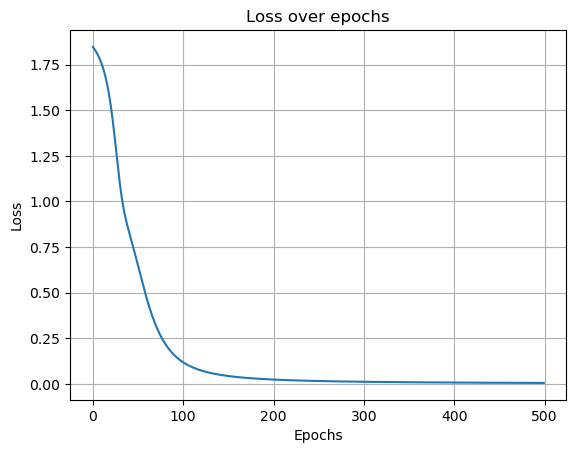

In [21]:
# Input data (X) and target output (y)
X = np.array([[1, 1,-1],
              [1, -1,-1],
              [-1, 1,-1],
              [1, 1,-1]])
y = np.array([[-1], [1], [1], [-1]])  # XOR problem


learning_rate = 0.5
epochs = 200

# Train the neural network
bp = BP_nn(X,y,5,0.1)
bp.train_neural_network(500)
bp.plot_loss()

# 三分类问题

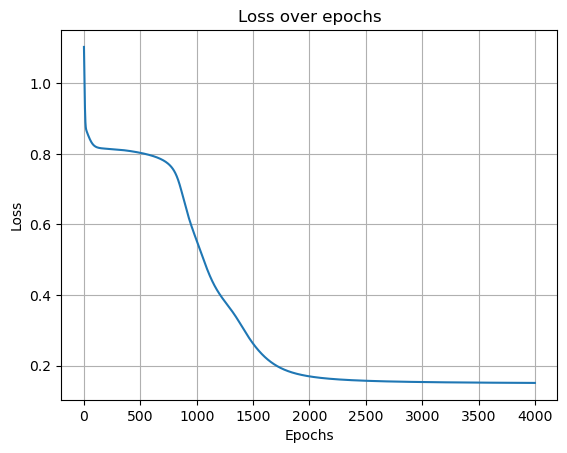

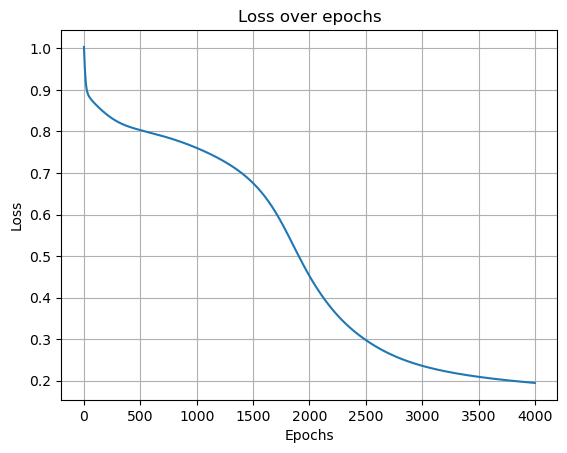

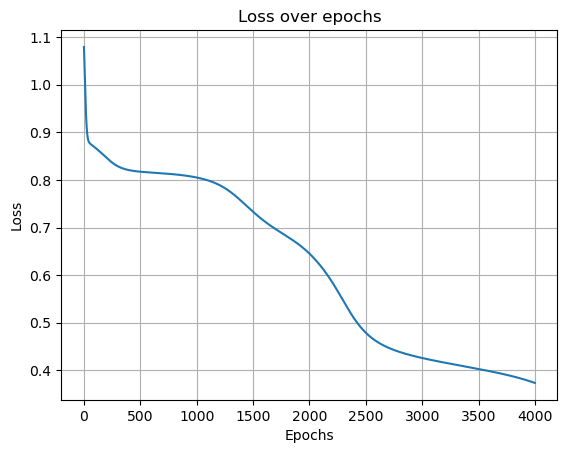

In [24]:
x_data =np.array([[0.25, 0.25],[0.75, 0.125],[0.25, 0.75],
                [0.5, 0.125], [0.75, 0.25], [0.25, 0.75],
                [0.25, 0.5], [0.5, 0.5], [0.75, 0.5]])
y_data =np.array([[1,-1,-1],[1,-1,-1],[1,-1,-1],
                [-1,1,-1],[-1,1,-1],[-1,1,-1],
                [-1,-1,1],[-1,-1,1],[-1,-1,1]])
x_data = np.array([[0.25, 0.25],[0.75, 0.125],[0.25, 0.75],
            [0.5, 0.125], [0.75, 0.25], [0.25, 0.75],
            [0.25, 0.5], [0.5, 0.5], [0.75, 0.5]])
y_data = np.array([[1,-1,-1],[1,-1,-1],[1,-1,-1],
            [-1,1,-1],[-1,1,-1],[-1,1,-1],
            [-1,-1,1],[-1,-1,1],[-1,-1,1]])

random_array = np.random.rand(9, 2)
random_array = random_array * 0.5 -0.25

x_data_n = x_data + random_array
x_data_normalized = 2 * (x_data - 0) / (1) - 1
bp1 = BP_nn(x_data_normalized,y_data,5,0.3)
bp1.train_neural_network(4000)
bp1.plot_loss()

bp2 = BP_nn(x_data_n,y_data,5,0.1)
bp2.train_neural_network(4000)
bp2.plot_loss()

bp3 = BP_nn(x_data_normalized,y_data,5,0.1)
bp3.train_neural_network(4000)
bp3.plot_loss()

# RBF

In [26]:
x_data =np.array([[0.25, 0.25],[0.75, 0.125],[0.25, 0.75],
                [0.5, 0.125], [0.75, 0.25], [0.25, 0.75],
                [0.25, 0.5], [0.5, 0.5], [0.75, 0.5]])
y_data =np.array([[1,-1,-1],[1,-1,-1],[1,-1,-1],
                [-1,1,-1],[-1,1,-1],[-1,1,-1],
                [-1,-1,1],[-1,-1,1],[-1,-1,1]])

#------------------------------------------------------------
# calculate the rbf hide layer output
# x: Input vector
# H: Hide node : row->sample
# sigma: variance of RBF

def rbf_hide_out(x, H, sigma):
    Hx = H - x
    Hxx = [np.exp(-np.dot(e,e)/(sigma**2)) for e in Hx]

    return Hxx

#------------------------------------------------------------
Hdim = np.array([rbf_hide_out(x, x_data, 0.5) for x in x_data]).T
W =np.dot(y_data.T, np.dot(np.linalg.inv(np.eye(9)*0.001+np.dot(Hdim.T,Hdim)),Hdim.T))
yy = np.dot(W, Hdim)

yy1 = np.array([[1 if e > 0 else -1 for e in l] for l in yy])
print(yy1)

err = [1 if any(x1!=x2) else 0 for x1,x2 in zip(yy1.T, y_data)]
print(err)


[[ 1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1  1  1  1]]
[0, 0, 1, 0, 1, 1, 0, 0, 0]


# GNRBF

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['NPY_MAXDIMS'] = '100'
class RBFnetwork(object):
    def __init__(self, hidden_size, r_w, r_c, r_sigma):
        self.h = hidden_size        #隐含层神经元个数
        self.w = 0                  #线性权值
        self.c = 0                  #神经元中心点
        self.sigma = 0              #高斯核宽度
        self.r = {"w":r_w, 
                  "c":r_c, 
                  "sigma":r_sigma}  #参数迭代的学习率
        self.errList = []           #误差列表
        self.n_iters = 0            #实际迭代次数
        self.tol = 1.0e-5           #最大容忍误差
        self.X = 0                  #训练集特征
        self.y = 0                  #训练集结果
        self.n_samples = 0          #训练集样本数量
        self.n_features = 0         #训练集特征数量
        self.y_features = 0
        self.y_samples = 0
    #计算径向基距离函数
    def guass(self, sigma, X, ci):
        #print(-np.linalg.norm((ci-X),axis=0))
        return np.exp(-np.linalg.norm((X-ci),axis=0)**2/(2*sigma**2))

    #将原数据高斯转化成新数据
    def change(self, sigma, X, c):
        newX = np.zeros((self.y_features, len(c)))
        #print(c,X)
        for i in range(len(c)):
            newX[:,i] = self.guass(sigma[i], X, c[i])
           # print(c[i])
        return newX

    #初始化参数
    def init(self):
        sigma = np.random.random((self.h, 1))               #(h,1)
        c = np.random.random((self.h, self.n_features))     #(h,n)
        w = np.random.random((self.h+1,1))                #(h+1,1)
        return sigma, c, w

    #给输出层的输入加一列截距项
    def addIntercept(self, X):
        return np.hstack((X,np.ones((self.y_features,1))))

    #计算整体误差
    def calSSE(self, prey, y):
        return 0.5*(np.linalg.norm(prey - y))**2

    #求L2范数的平方
    def l2(self, X, c):
        newX = np.zeros((self.y_features, len(c)))
        for i in range(len(c)):
            newX[:,i] = np.linalg.norm((X-c[i]))**2
        return newX
        #训练
    def train(self, X, y, iters):
        self.X = X
        self.y = y
        self.y_samples, self.y_features = y.shape
        self.n_samples, self.n_features = X.shape
        sigma, c, w = self.init()  
        error = 0#初始化参数
        for i in range(iters):
            ##正向计算过程
            deltaw=np.zeros(w.shape)
            deltasigma = np.zeros(sigma.shape)
            deltac2 = np.zeros((1,self.n_features))
            for k in range(self.n_samples):
                y_temp = y[k].reshape(-1,1)
                hi_output = self.change(sigma,X[k],c)              #隐含层输出(3,h)，即通过径向基函数的转换
                #print(hi_output)
                yi_input = self.addIntercept(hi_output)         #输出层输入(3,h+1)，因为是线性加权，故将偏置加入
                yi_output = np.dot(yi_input, w)                 #输出预测值(m,y_f)
                error = self.calSSE(yi_output, y_temp)               #计算误差

                deltaw += np.dot(yi_input.T, (yi_output-y_temp))      #(h+1,m)x(m,1)
                deltasigma += np.divide(np.multiply(np.dot(np.multiply(hi_output,self.l2(X[k],c)).T, \
                            (yi_output-y_temp)), w[:-1]), sigma**3)  #(h,m)x(m,1)
                deltac2 += np.dot((yi_output-y_temp).reshape(1,self.y_features),np.dot(hi_output, X[k]-c))
                
            w -= self.r['w']*deltaw/self.n_samples
            sigma -= self.r['sigma']*deltasigma/self.n_samples
            deltac1 = np.divide(w[:-1],sigma**2)
            deltac = np.dot(deltac1,deltac2) 
            c -= self.r['c']*deltac/self.n_samples
            if error < self.tol:
                break
            self.errList.append(error)                      #保存误差
            self.c = c
            self.w = w
            self.sigma = sigma
            self.n_iters = i
            #预测
    def predict(self, X):
        hi_output = self.change(self.sigma,X,self.c)    #隐含层输出(m,h)，即通过径向基函数的转换
        yi_input = self.addIntercept(hi_output)         #输出层输入(m,h+1)，因为是线性加权，故将偏置加入
        yi_output = np.dot(yi_input, self.w)            #输出预测值(m,1)
        return yi_output
    def plot_loss(self):
        plt.plot(self.errList)
        plt.title('Loss over epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()

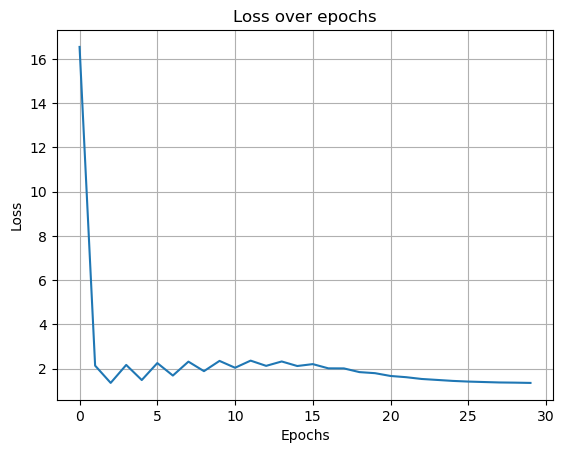

In [29]:
rbf1 = RBFnetwork(10, 0.1, 0.2, 0.1)
rbf1.train(x_data, y_data, 30)
rbf1.plot_loss()